In [73]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



Defining some constants

In [74]:
RANDOM_STATE = 42

ignore warnings about convergence of models, etc.

In [75]:
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

# Import dataset



In [76]:
df = pd.read_csv('./data/breast-cancer-diagnostic.shuf.lrn.csv')
df.head()

,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,886452,True,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,...,16.39,22.07,108.10,826.0,0.1512,0.3262,0.3209,0.1374,0.3068,0.07957
1,84348301,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
2,9012795,True,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.4024,0.1966,0.2730,0.08666
3,894326,True,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,...,21.84,25.00,140.90,1485.0,0.1434,0.2763,0.3853,0.1776,0.2812,0.08198
4,867387,False,15.71,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,...,17.50,19.25,114.30,922.8,0.1223,0.1949,0.1709,0.1374,0.2723,0.07071


In [77]:
df.describe()

,ID,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
count,2.850000e+02,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,2.575517e+07,13.946439,19.376246,90.756842,637.428772,0.096595,0.104231,0.085204,0.047139,0.179774,...,16.038446,25.909614,105.767088,854.987719,0.132928,0.253865,0.266263,0.112879,0.287262,0.083770
std,1.073900e+08,3.488308,4.278841,24.062045,340.172969,0.014748,0.055230,0.077423,0.038661,0.029706,...,4.785408,6.101124,33.468918,550.723964,0.025036,0.165161,0.210121,0.067894,0.062336,0.019355
min,8.913000e+03,7.691000,9.710000,47.980000,170.400000,0.062510,0.019380,0.000000,0.000000,0.106000,...,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156600,0.055210
25%,8.688710e+05,11.510000,16.390000,73.990000,406.300000,0.085880,0.065450,0.029870,0.018990,0.160100,...,12.840000,21.590000,82.980000,506.200000,0.114800,0.143200,0.111700,0.062960,0.248200,0.070550
50%,9.051890e+05,13.140000,18.900000,85.240000,530.600000,0.095970,0.087510,0.054850,0.031100,0.177600,...,14.730000,25.340000,96.090000,656.700000,0.131200,0.205300,0.193200,0.092650,0.279000,0.079440
75%,8.812816e+06,15.500000,21.840000,102.800000,747.200000,0.105900,0.128400,0.115500,0.067720,0.194300,...,18.130000,29.940000,123.500000,1030.000000,0.148300,0.325300,0.385300,0.166300,0.315700,0.091800
max,9.112962e+08,25.730000,39.280000,174.200000,2010.000000,0.163400,0.345400,0.426400,0.191300,0.304000,...,33.130000,44.870000,229.300000,3234.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       285 non-null    int64  
 1   class                    285 non-null    bool   
 2   radiusMean               285 non-null    float64
 3    textureMean             285 non-null    float64
 4    perimeterMean           285 non-null    float64
 5    areaMean                285 non-null    float64
 6    smoothnessMean          285 non-null    float64
 7    compactnessMean         285 non-null    float64
 8    concavityMean           285 non-null    float64
 9    concavePointsMean       285 non-null    float64
 10   symmetryMean            285 non-null    float64
 11   fractalDimensionMean    285 non-null    float64
 12   radiusStdErr            285 non-null    float64
 13   textureStdErr           285 non-null    float64
 14   perimeterStdErr         2

## Data preparation

1. Check for missing values


In [79]:
print(f'Missing values: {df.isnull().sum().any()}')

Missing values: False


1Encode Boolean target attribute 'class' as Integer
2Drop the 'ID' attribute
3Separate the 'class' attribute into its own variable

In [80]:
df['class'] = df['class'].astype(int)
X = df.drop(columns=['ID', 'class'])
Y = df['class']


Training-test data split for holdout method

In [81]:
holdout_X_train, holdout_X_test, holdout_Y_train, holdout_Y_test = train_test_split(X, Y, test_size=0.2,
                                                                                    random_state=42)


Data split for cross-validation method
Scaling set up in pipelines for individual algorithms

In [82]:
cross_validation_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Prepare data structures and useful functions

In [83]:
def get_metrics_dict(
        accuracy: float,
        f1: float,
        precision: float,
        recall: float,
) -> dict[str, float]:
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall,
    }


def find_best_estimator(
        classifier,
        param_grid: dict,
        cv: int = 5,
        n_jobs: int = -1
) -> GridSearchCV:
    grid_search = GridSearchCV(
        classifier,
        param_grid=param_grid,
        cv=cv,
        scoring="accuracy",
        n_jobs=n_jobs
    )
    grid_search.fit(holdout_X_train, holdout_Y_train)
    return grid_search.best_estimator_


def boxplot_metric_by_class(
        df: pd.DataFrame,
        metrics: list[str],
        clazz: str | None,
        title: str,
        width_per_figure: int = 2,
        height: int = 6
) -> None:
    num_metrics = len(metrics)
    columns_per_subplot = df[clazz].nunique() if clazz is not None else 1
    fig, axes = plt.subplots(1, num_metrics, figsize=(columns_per_subplot * num_metrics * width_per_figure, height))
    axes = [axes] if num_metrics == 1 else axes
    palette = sns.color_palette("husl", num_metrics)
    for ax, metric, color in zip(axes, metrics, palette):
        sns.boxplot(x=clazz, y=metric, data=df, ax=ax, color=color)
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()



## Random Forest

In [84]:
def run_random_forest(classifier: RandomForestClassifier | None = None) -> list[dict[str, any]]:
    if classifier is None:
        classifier = RandomForestClassifier()

    classifier.set_params(random_state=RANDOM_STATE)

    # Holdout method
    classifier.fit(holdout_X_train, holdout_Y_train)
    holdout_y_pred = classifier.predict(holdout_X_test)
    holdout_results = get_metrics_dict(
        accuracy=accuracy_score(holdout_Y_test, holdout_y_pred),
        f1=f1_score(holdout_Y_test, holdout_y_pred),
        precision=precision_score(holdout_Y_test, holdout_y_pred),
        recall=recall_score(holdout_Y_test, holdout_y_pred),
    )

    # Cross-validation
    cv_scores = cross_validate(classifier, X, Y, cv=cross_validation_split,
                               scoring=['accuracy', 'f1', 'precision', 'recall'])
    cv_results = get_metrics_dict(
        accuracy=cv_scores['test_accuracy'].mean(),
        f1=cv_scores['test_f1'].mean(),
        precision=cv_scores['test_precision'].mean(),
        recall=cv_scores['test_recall'].mean(),
    )

    common_results = {
        "classifier": "Random Forest",
        "n_estimators": classifier.n_estimators,
        "max_depth": classifier.max_depth,
        "min_samples_split": classifier.min_samples_split,
        "min_samples_leaf": classifier.min_samples_leaf,
    }

    return [
        {
            **common_results,
            "Data Split": "Holdout",
            **holdout_results
        },
        {
            **common_results,
            "Data Split": "Cross Validation",
            **cv_results
        }
    ]


Test random forest in various configurations

In [85]:
rf_classifiers = [
    RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1),
    RandomForestClassifier(n_estimators=200, min_samples_split=4, min_samples_leaf=1),
    RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=15),
    RandomForestClassifier(n_estimators=150, min_samples_split=5, min_samples_leaf=2, max_depth=20),
    RandomForestClassifier(n_estimators=250, min_samples_split=3, min_samples_leaf=3, max_depth=10)
]

rf_results = []
for classifier in rf_classifiers:
    rf_results.extend(run_random_forest(classifier))  # Assumes run_random_forest is defined elsewhere

rf_results_df = pd.DataFrame(rf_results)
rf_results_df.sort_values(by='accuracy', ascending=False).round(3)

,classifier,n_estimators,max_depth,min_samples_split,min_samples_leaf,Data Split,accuracy,f1,precision,recall
0,Random Forest,100,NaN,2,1,Holdout,0.982,0.979,1.000,0.958
2,Random Forest,200,NaN,4,1,Holdout,0.982,0.979,1.000,0.958
8,Random Forest,250,10.0,3,3,Holdout,0.982,0.979,1.000,0.958
4,Random Forest,100,15.0,2,4,Holdout,0.982,0.979,1.000,0.958
6,Random Forest,150,20.0,5,2,Holdout,0.982,0.979,1.000,0.958
3,Random Forest,200,NaN,4,1,Cross Validation,0.961,0.943,0.959,0.928
1,Random Forest,100,NaN,2,1,Cross Validation,0.958,0.937,0.948,0.928
9,Random Forest,250,10.0,3,3,Cross Validation,0.954,0.933,0.938,0.928
5,Random Forest,100,15.0,2,4,Cross Validation,0.951,0.926,0.948,0.908
7,Random Forest,150,20.0,5,2,Cross Validation,0.951,0.927,0.938,0.918


Plot metrics by method of data splitting

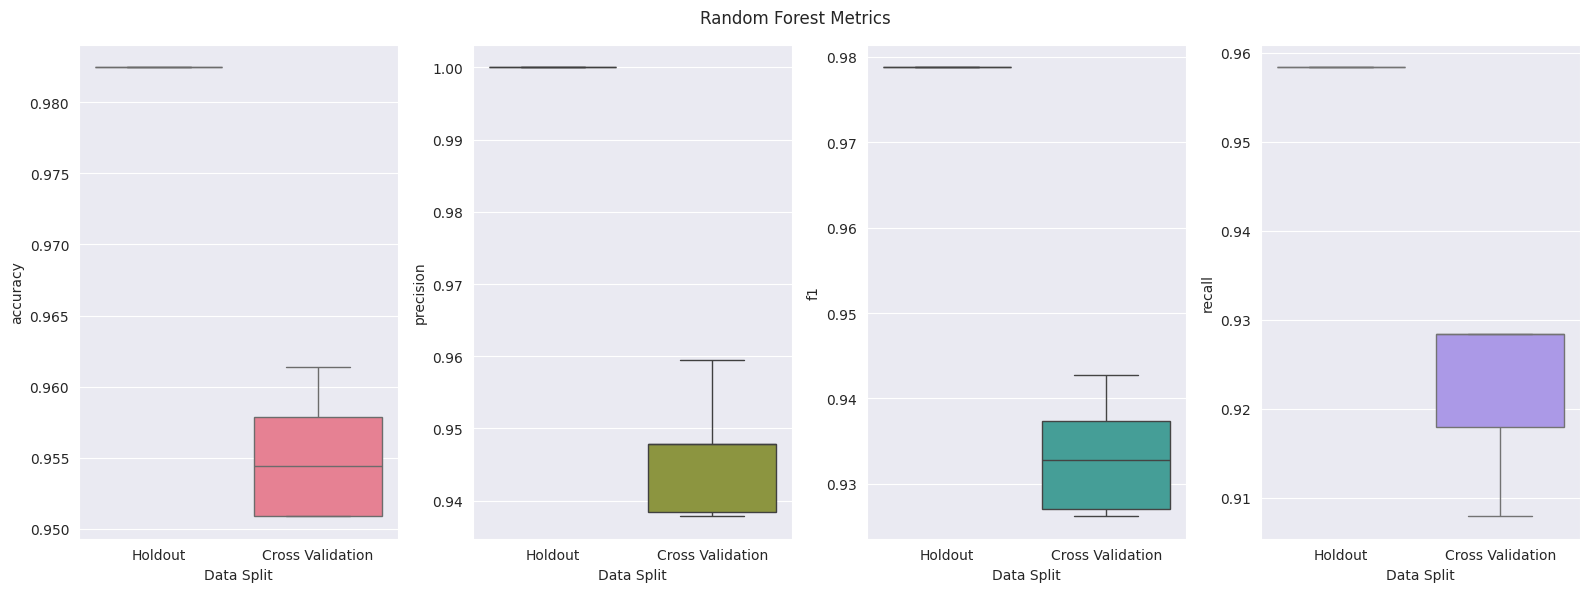

In [86]:
boxplot_metric_by_class(rf_results_df, ['accuracy', 'precision', 'f1', 'recall'], 'Data Split', 'Random Forest Metrics')

Attempt to find best configuration using GridSearchCV

In [87]:
rf_param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
}

best_rf = find_best_estimator(
    classifier=RandomForestClassifier(),
    param_grid=rf_param_grid,
    cv=5
)

best_rf_results = pd.DataFrame(run_random_forest(best_rf))
best_rf_results

,classifier,n_estimators,max_depth,min_samples_split,min_samples_leaf,Data Split,accuracy,f1,precision,recall
0,Random Forest,100,None,2,1,Holdout,0.982456,0.978723,1.000000,0.958333
1,Random Forest,100,None,2,1,Cross Validation,0.957895,0.937382,0.947895,0.928421



## MLP


In [88]:
def run_mlp(classifier: MLPClassifier | None = None) -> list[dict[str, any]]:
    if classifier is None:
        classifier = MLPClassifier()

    # create a pipeline which both scales data using standard scaler and then estimates using MLP
    classifier.set_params(random_state=RANDOM_STATE)
    pipeline = Pipeline([
        ('scale', StandardScaler()),
        ('mlp', classifier),
    ])
    # holdout method
    pipeline.fit(holdout_X_train, holdout_Y_train)
    holdout_y_pred = pipeline.predict(holdout_X_test)

    holdout_results = get_metrics_dict(
        accuracy=accuracy_score(holdout_Y_test, holdout_y_pred),
        f1=f1_score(holdout_Y_test, holdout_y_pred),
        precision=precision_score(holdout_Y_test, holdout_y_pred),
        recall=recall_score(holdout_Y_test, holdout_y_pred),
    )

    # cross validation
    cv_scores = cross_validate(pipeline, X, Y, cv=cross_validation_split,
                               scoring=['accuracy', 'f1', 'precision', 'recall'])
    cv_results = get_metrics_dict(
        accuracy=cv_scores['test_accuracy'].mean(),
        f1=cv_scores['test_f1'].mean(),
        precision=cv_scores['test_precision'].mean(),
        recall=cv_scores['test_recall'].mean(),
    )

    common_results = {
        "classifier": "MLP",
        "hidden_layer_sizes": classifier.hidden_layer_sizes,
        "max_iter": classifier.max_iter,
        "activation": classifier.activation,
        "solver": classifier.solver,
    }

    return [
        {
            **common_results,
            "Data Split": "Holdout",
            **holdout_results
        },
        {
            **common_results,
            "Data Split": "Cross Validation",
            **cv_results
        }
    ]

Test MLP in various configurations.
There are quite a lot of parameters to vary here, we can test only a limited amount.

In [89]:

mlp_classifiers = [
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=200),
    MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200),
    MLPClassifier(hidden_layer_sizes=(200,), max_iter=300, activation="logistic"),
    MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=300, solver="lbfgs"),
    MLPClassifier(hidden_layer_sizes=(300,), max_iter=500, activation="identity")
]

mlp_results = []
for classifier in mlp_classifiers:
    mlp_results.extend(run_mlp(classifier))

mlp_results_df = pd.DataFrame(mlp_results)
mlp_results_df.sort_values(by='accuracy', ascending=False).round(3)

,classifier,hidden_layer_sizes,max_iter,activation,solver,Data Split,accuracy,f1,precision,recall
0,MLP,"(100,)",200,relu,adam,Holdout,1.000,1.000,1.000,1.000
4,MLP,"(200,)",300,logistic,adam,Holdout,1.000,1.000,1.000,1.000
5,MLP,"(200,)",300,logistic,adam,Cross Validation,0.982,0.973,1.000,0.948
2,MLP,"(100, 50)",200,relu,adam,Holdout,0.982,0.980,0.960,1.000
8,MLP,"(300,)",500,identity,adam,Holdout,0.982,0.979,1.000,0.958
3,MLP,"(100, 50)",200,relu,adam,Cross Validation,0.979,0.969,0.979,0.959
1,MLP,"(100,)",200,relu,adam,Cross Validation,0.975,0.964,0.970,0.959
9,MLP,"(300,)",500,identity,adam,Cross Validation,0.968,0.954,0.950,0.959
6,MLP,"(100, 50, 25)",300,relu,lbfgs,Holdout,0.965,0.960,0.923,1.000
7,MLP,"(100, 50, 25)",300,relu,lbfgs,Cross Validation,0.965,0.948,0.950,0.948


Plot metrics by method of data splitting

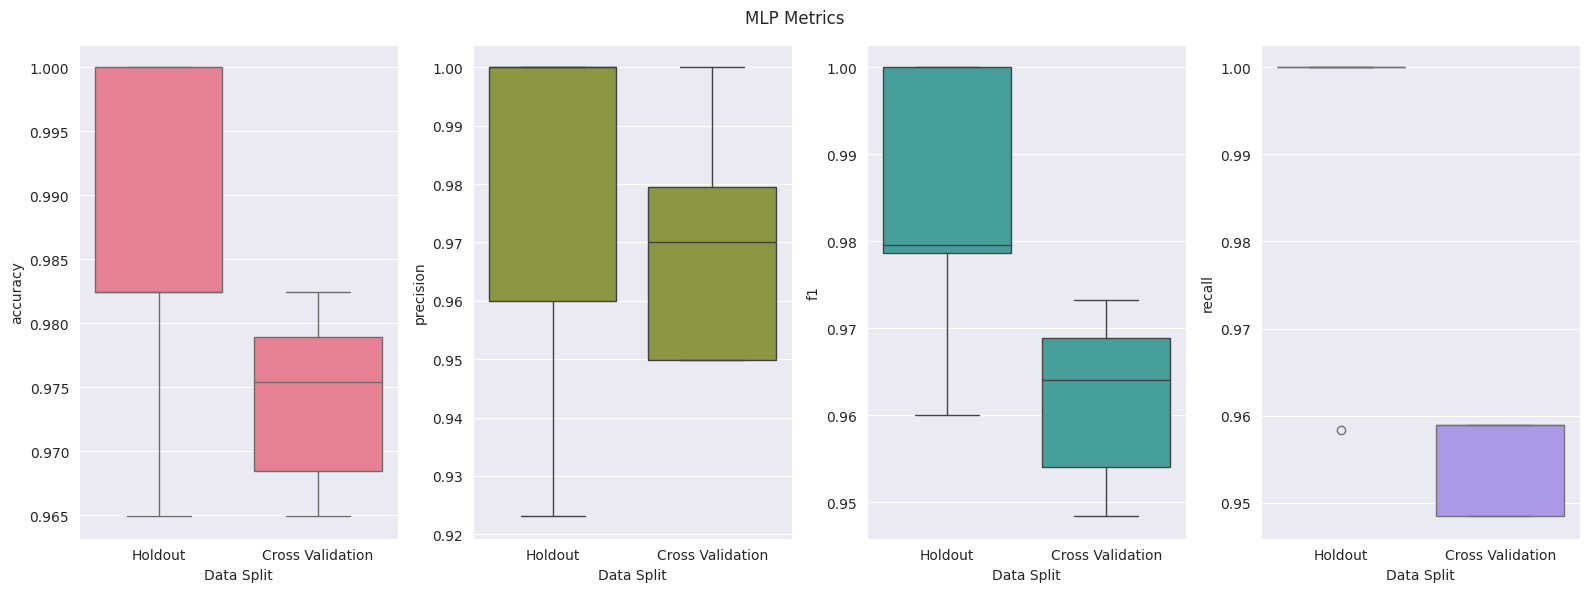

In [90]:
boxplot_metric_by_class(mlp_results_df, ['accuracy', 'precision', 'f1', 'recall'], 'Data Split', 'MLP Metrics')

Attempt to find best configuration using GridSearchCV

In [91]:
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,), (100, 50), (100, 50, 25)],
    'max_iter': [200, 300, 500],
    'activation': ['relu', 'tanh', 'logistic'],  # Optional for activation exploration
    'solver': ['adam', 'sgd'],  # Optional for solver exploration
}

# run MLP GridSearchCV single-threaded -
# there is unfortunately no very reliable way to filter the ConvergenceWarning in the child processes spawned by GridSearchCV
# see https://github.com/scikit-learn/scikit-learn/issues/27561
best_mlp = find_best_estimator(
    classifier=MLPClassifier(),
    param_grid=mlp_param_grid,
    cv=5,
    n_jobs=1
)

best_mlp_results = pd.DataFrame(run_mlp(best_mlp))
best_mlp_results

,classifier,hidden_layer_sizes,max_iter,activation,solver,Data Split,accuracy,f1,precision,recall
0,MLP,"(200,)",500,logistic,adam,Holdout,1.000000,1.00000,1.000000,1.000000
1,MLP,"(200,)",500,logistic,adam,Cross Validation,0.975439,0.96325,0.978889,0.948421


## SVC

In [92]:
def run_svc(classifier: SVC | None = None) -> list[dict[str, any]]:
    if classifier is None:
        classifier = SVC()

    pipeline = Pipeline([
        ('scale', StandardScaler()),
        ('svc', classifier),
    ])
    # Holdout method
    pipeline.fit(holdout_X_train, holdout_Y_train)
    holdout_y_pred = pipeline.predict(holdout_X_test)
    holdout_results = get_metrics_dict(
        accuracy=accuracy_score(holdout_Y_test, holdout_y_pred),
        f1=f1_score(holdout_Y_test, holdout_y_pred),
        precision=precision_score(holdout_Y_test, holdout_y_pred),
        recall=recall_score(holdout_Y_test, holdout_y_pred),
    )

    # Cross-validation
    cv_scores = cross_validate(pipeline, X, Y, cv=cross_validation_split,
                               scoring=['accuracy', 'f1', 'precision', 'recall'])
    cv_results = get_metrics_dict(
        accuracy=cv_scores['test_accuracy'].mean(),
        f1=cv_scores['test_f1'].mean(),
        precision=cv_scores['test_precision'].mean(),
        recall=cv_scores['test_recall'].mean(),
    )

    common_results = {
        "classifier": "SVC",
        "kernel": classifier.kernel,
        "C": classifier.C,
        "gamma": classifier.gamma,
        "degree": classifier.degree,
        "coef0": classifier.coef0
    }

    return [
        {
            **common_results,
            "Data Split": "Holdout",
            **holdout_results
        },
        {
            **common_results,
            "Data Split": "Cross Validation",
            **cv_results
        }
    ]


Test SVC in various configurations

In [93]:
svc_classifiers = [
    SVC(kernel='linear', C=0.1, gamma='scale'),
    SVC(kernel='rbf', C=1.0, gamma=0.1),
    SVC(kernel='poly', degree=2, C=1.0, gamma='auto', coef0=0.0),
    SVC(kernel='poly', degree=3, C=10.0, gamma='scale', coef0=1.0),
    SVC(kernel='sigmoid', C=0.5, gamma=0.01, coef0=0.5)
]

svc_results = []
for classifier in svc_classifiers:
    svc_results.extend(run_svc(classifier))

svc_results_df = pd.DataFrame(svc_results)
svc_results_df.sort_values(by='accuracy', ascending=False).round(3)

,classifier,kernel,C,gamma,degree,coef0,Data Split,accuracy,f1,precision,recall
0,SVC,linear,0.1,scale,3,0.0,Holdout,1.000,1.000,1.000,1.000
2,SVC,rbf,1.0,0.1,3,0.0,Holdout,0.982,0.979,1.000,0.958
8,SVC,sigmoid,0.5,0.01,3,0.5,Holdout,0.982,0.979,1.000,0.958
1,SVC,linear,0.1,scale,3,0.0,Cross Validation,0.982,0.974,1.000,0.949
9,SVC,sigmoid,0.5,0.01,3,0.5,Cross Validation,0.968,0.951,1.000,0.907
6,SVC,poly,10.0,scale,3,1.0,Holdout,0.965,0.958,0.958,0.958
7,SVC,poly,10.0,scale,3,1.0,Cross Validation,0.958,0.940,0.924,0.959
3,SVC,rbf,1.0,0.1,3,0.0,Cross Validation,0.947,0.925,0.915,0.939
4,SVC,poly,1.0,auto,2,0.0,Holdout,0.842,0.769,1.000,0.625
5,SVC,poly,1.0,auto,2,0.0,Cross Validation,0.800,0.605,0.936,0.454


Plot metrics by method of data splitting

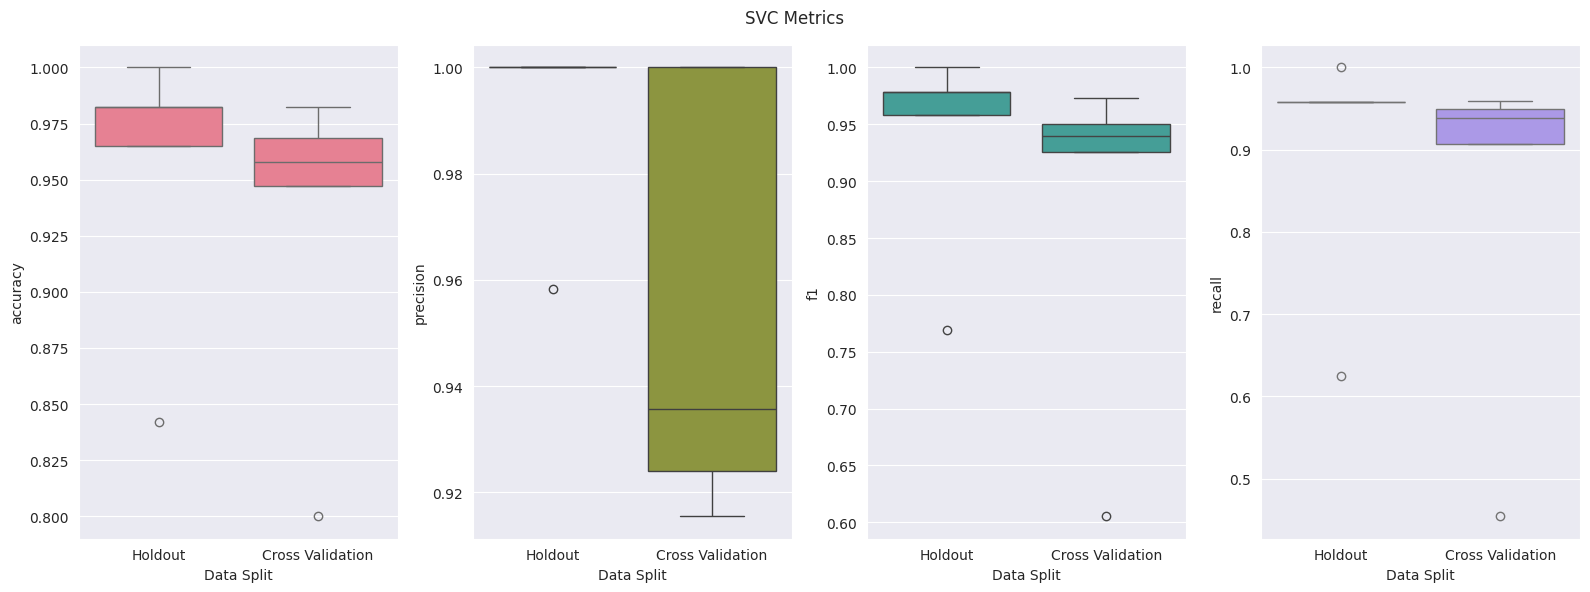

In [94]:
boxplot_metric_by_class(svc_results_df, ['accuracy', 'precision', 'f1', 'recall'], 'Data Split', 'SVC Metrics')

Attempt to find best configuration using GridSearchCV


In [95]:
svc_param_grid = {
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1],
    'degree': [2, 3],
    'coef0': [0.0, 0.5]
}

best_svc = find_best_estimator(
    classifier=SVC(),
    param_grid=svc_param_grid,
    cv=5
)

best_svc_results = pd.DataFrame(run_svc(best_svc))
best_svc_results


,classifier,kernel,C,gamma,degree,coef0,Data Split,accuracy,f1,precision,recall
0,SVC,linear,10,scale,2,0.0,Holdout,0.964912,0.958333,0.958333,0.958333
1,SVC,linear,10,scale,2,0.0,Cross Validation,0.954386,0.933261,0.928847,0.937895


## Combining results

In [96]:
results = pd.concat(
    [rf_results_df, mlp_results_df, svc_results_df, best_rf_results, best_mlp_results, best_svc_results], join='inner')
results.sort_values(by='accuracy', ascending=False).round(3)

,classifier,Data Split,accuracy,f1,precision,recall
0,SVC,Holdout,1.000,1.000,1.000,1.000
0,MLP,Holdout,1.000,1.000,1.000,1.000
4,MLP,Holdout,1.000,1.000,1.000,1.000
0,MLP,Holdout,1.000,1.000,1.000,1.000
5,MLP,Cross Validation,0.982,0.973,1.000,0.948
8,SVC,Holdout,0.982,0.979,1.000,0.958
2,Random Forest,Holdout,0.982,0.979,1.000,0.958
0,Random Forest,Holdout,0.982,0.979,1.000,0.958
2,SVC,Holdout,0.982,0.979,1.000,0.958
2,MLP,Holdout,0.982,0.980,0.960,1.000


Overall results by classifier as boxplots

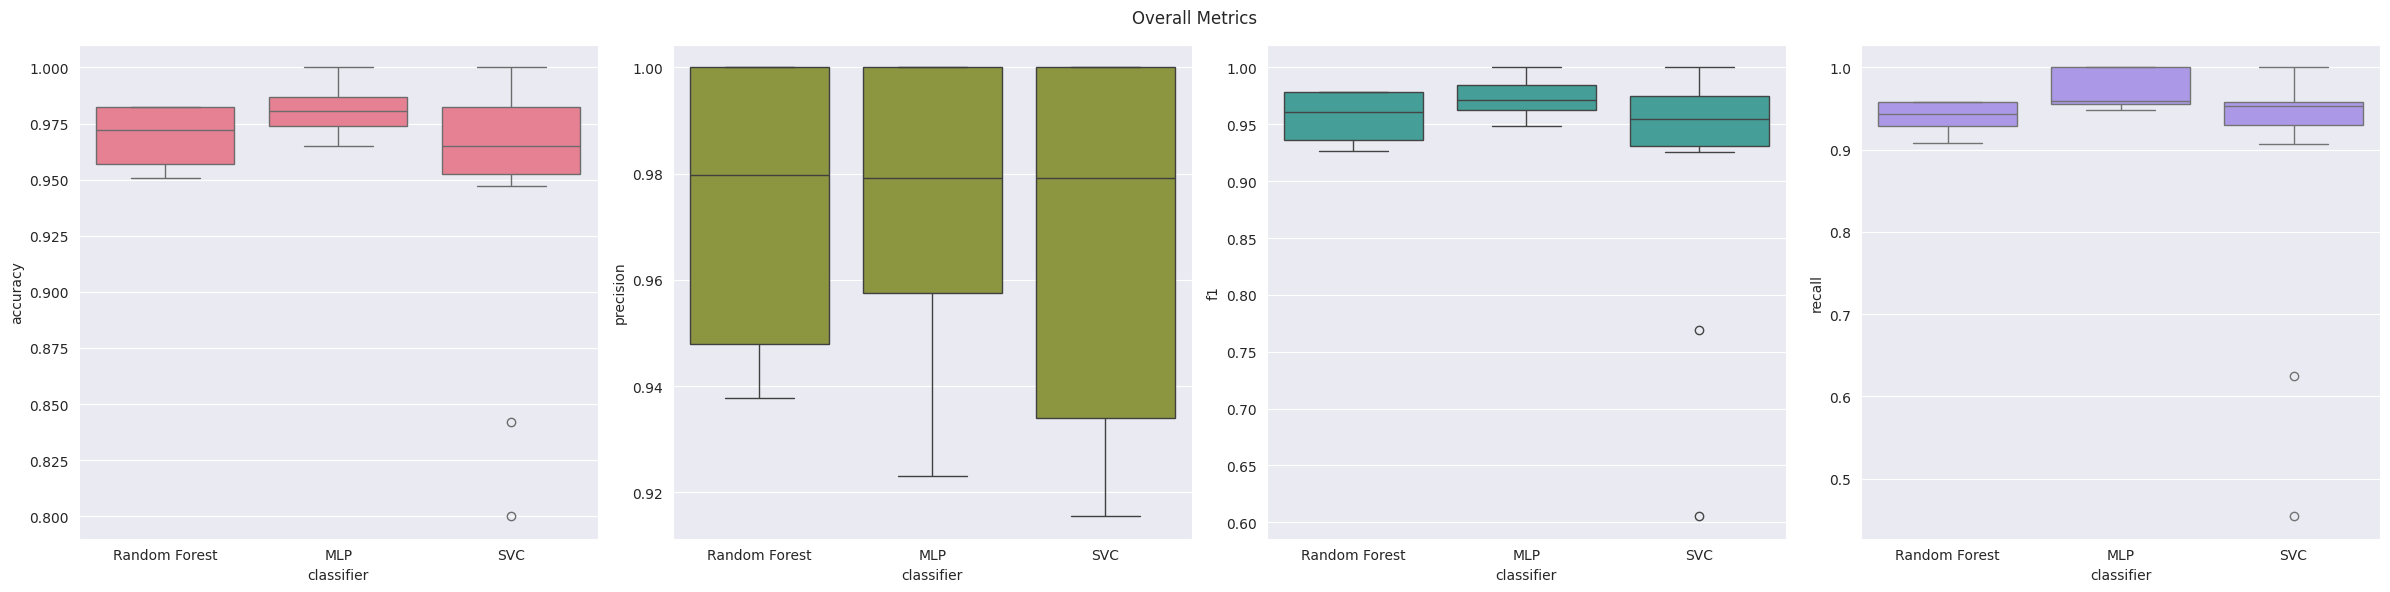

In [97]:
boxplot_metric_by_class(results, ['accuracy', 'precision', 'f1', 'recall'], 'classifier', 'Overall Metrics')